In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [2]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

Text(0, 0.5, 'x2')

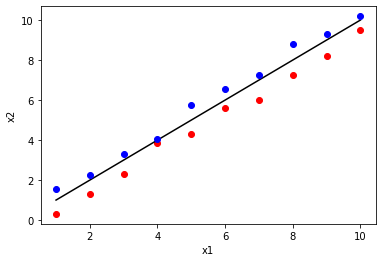

In [3]:
# Simple logistic regression classifier
# Prepare input
n = 10
x1 = np.arange(1,n+1,1).reshape(1,n)
x2below = x1 - np.random.rand(1,n)
x2above = x1 + np.random.rand(1,n)
plt.plot(np.squeeze(x1),np.squeeze(x2below),'or')
plt.plot(np.squeeze(x1),np.squeeze(x1),'k')
plt.plot(np.squeeze(x1),np.squeeze(x2above),'ob')
plt.xlabel('x1')
plt.ylabel('x2')

In [4]:
# Prepare input
X1 = np.concatenate((x1,x2below),axis=0)
X2 = np.concatenate((x1,x2above),axis=0)
X = np.concatenate((X1,X2),axis=1)
Y = np.concatenate((np.zeros((n,1)),np.ones((n,1))),axis=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy of logistic regression: 100 % (percentage of correctly labelled datapoints)


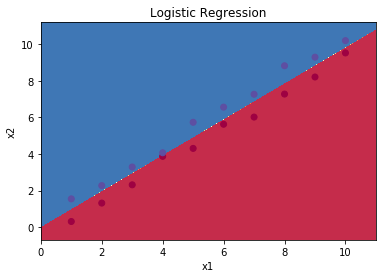

In [5]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")